In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
df = pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv")

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
df.shape

(500, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.duplicated().sum()

0

In [7]:
#End goal is not making the making as good neural network
df.drop(columns=['Serial No.'] , inplace=True)

In [8]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [9]:
X = df.iloc[: , 0:-1]
y = df.iloc[: , -1]

In [10]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [11]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [15]:
X_test_scaled

array([[ 0.46      ,  0.5       ,  0.25      ,  0.375     ,  0.14285714,
         0.5224359 ,  0.        ],
       [ 0.44      ,  0.53571429,  0.5       ,  0.5       ,  0.42857143,
         0.53205128,  1.        ],
       [ 0.98      ,  0.96428571,  1.        ,  0.875     ,  0.71428571,
         0.92948718,  0.        ],
       [ 0.52      ,  0.53571429,  0.25      ,  0.625     ,  0.57142857,
         0.58974359,  1.        ],
       [ 0.7       ,  0.64285714,  0.75      ,  0.875     ,  0.71428571,
         0.69230769,  1.        ],
       [ 0.42      ,  0.32142857,  0.25      ,  0.375     ,  0.57142857,
         0.49358974,  1.        ],
       [ 0.6       ,  0.42857143,  0.5       ,  0.5       ,  0.57142857,
         0.62179487,  1.        ],
       [ 0.74      ,  0.39285714,  0.5       ,  0.75      ,  0.71428571,
         0.48076923,  1.        ],
       [ 0.62      ,  0.67857143,  0.5       ,  0.625     ,  0.71428571,
         0.65064103,  1.        ],
       [ 0.56      ,  0.5   

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [17]:
model = Sequential()

In [18]:
model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))

In [19]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x79f82394fa30>>

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='mean_squared_error' , optimizer='Adam' , metrics=['accuracy'])

In [22]:
history = model.fit(X_train_scaled , y_train , epochs=500 , validation_split=0.2)

Epoch 1/500
10/10 [==============================] - 1s 23ms/step - loss: 0.5225 - accuracy: 0.0000e+00 - val_loss: 0.3766 - val_accuracy: 0.0000e+00
Epoch 2/500
10/10 [==============================] - 0s 4ms/step - loss: 0.2739 - accuracy: 0.0000e+00 - val_loss: 0.1556 - val_accuracy: 0.0000e+00
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 0.1068 - accuracy: 0.0000e+00 - val_loss: 0.0476 - val_accuracy: 0.0000e+00
Epoch 4/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0370 - accuracy: 0.0000e+00 - val_loss: 0.0200 - val_accuracy: 0.0000e+00
Epoch 5/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0242 - accuracy: 0.0000e+00 - val_loss: 0.0214 - val_accuracy: 0.0000e+00
Epoch 6/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0244 - accuracy: 0.0000e+00 - val_loss: 0.0217 - val_accuracy: 0.0000e+00
Epoch 7/500
10/10 [==============================] - 0s 4ms/step - loss: 0.0231 - accuracy: 0.0000e+00 - 

In [23]:
model.save("ee.ww")

In [24]:
model.layers[0].get_weights()

[array([[-0.57578427,  0.5128722 , -0.14503594,  0.06421399, -0.36275142,
          0.47812358, -0.21953768],
        [-0.0285677 ,  0.07580616,  0.619949  , -0.42758334,  0.63729507,
          0.04965395, -0.19366246],
        [ 0.2856844 ,  0.20551647, -0.61454564, -0.23939359, -0.6351895 ,
          0.5534311 , -0.58723044],
        [ 0.23443112,  0.8187611 ,  0.50530344, -0.14123744, -0.3497958 ,
         -0.3820988 , -0.2309658 ],
        [-0.56178695,  0.24792759,  0.6567398 , -0.5864807 ,  0.4513809 ,
         -0.5174829 , -0.2961845 ],
        [-0.6694041 ,  0.06597929,  0.0465251 , -0.51419175,  0.77241516,
         -0.05803241, -0.37705645],
        [ 0.37139633, -0.00086401,  0.45132956, -0.0305984 ,  0.4211504 ,
          0.01875578, -0.04884058]], dtype=float32),
 array([-0.13719942,  0.06661469, -0.08772383,  0.        ,  0.13074581,
        -0.04396242,  0.        ], dtype=float32)]

In [25]:
model.layers[1].get_weights()

[array([[-0.30861157, -0.56771874,  0.2681866 , -0.46756572,  0.18613395,
         -0.38561708,  0.30834836],
        [-0.17894632,  0.2550179 ,  0.01451774,  0.24173796, -0.02706344,
          0.23567688,  0.43318638],
        [-0.16050088,  0.02969037,  0.43402448, -0.3285833 ,  0.36564732,
          0.07678304,  0.19469456],
        [-0.6544531 , -0.094607  , -0.34634882,  0.5984819 ,  0.5469066 ,
         -0.11874253,  0.29846722],
        [-0.44727695,  0.55749214,  0.44962716,  0.37567082, -0.7476239 ,
         -0.16425535,  0.29112315],
        [-0.4457703 , -0.44872698, -0.30335113,  0.4157374 , -0.44591323,
          0.00551841, -0.35470244],
        [-0.19430286, -0.6116343 , -0.28508273, -0.06978363, -0.35881692,
         -0.16778958,  0.48578238]], dtype=float32),
 array([ 0.        ,  0.06200932, -0.14147381,  0.07012583,  0.02667999,
        -0.04595624,  0.06132496], dtype=float32)]

In [26]:
model.layers[2].get_weights()

[array([[ 0.25032097],
        [ 0.46839318],
        [-0.5594462 ],
        [ 0.623742  ],
        [-0.25740802],
        [-0.23683506],
        [ 0.47475183]], dtype=float32),
 array([0.06029015], dtype=float32)]

In [27]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 2ms/step


In [28]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred)

0.8030285728776805

In [29]:
import matplotlib.pyplot as plt

In [30]:
history.history

{'loss': [0.5225011110305786,
  0.2739255726337433,
  0.10678627341985703,
  0.03700912371277809,
  0.024217823520302773,
  0.02437654696404934,
  0.023099100217223167,
  0.021208036690950394,
  0.020155755802989006,
  0.019456950947642326,
  0.01886247843503952,
  0.018273992463946342,
  0.01776442490518093,
  0.01718730852007866,
  0.016665931791067123,
  0.01616320013999939,
  0.015698349103331566,
  0.015279772691428661,
  0.014851780608296394,
  0.014428381808102131,
  0.014053121209144592,
  0.013684655539691448,
  0.013301162049174309,
  0.012961676344275475,
  0.012658627703785896,
  0.012332846410572529,
  0.01203786488622427,
  0.011760339140892029,
  0.01151022408157587,
  0.01125954370945692,
  0.011016195639967918,
  0.01082603819668293,
  0.01057626586407423,
  0.010407140478491783,
  0.010211942717432976,
  0.009988092817366123,
  0.009791126474738121,
  0.009631754830479622,
  0.00946885161101818,
  0.009292199276387691,
  0.009143475443124771,
  0.008975919336080551,
 

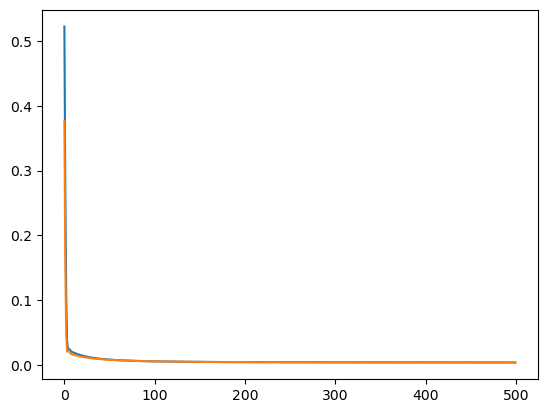

In [31]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

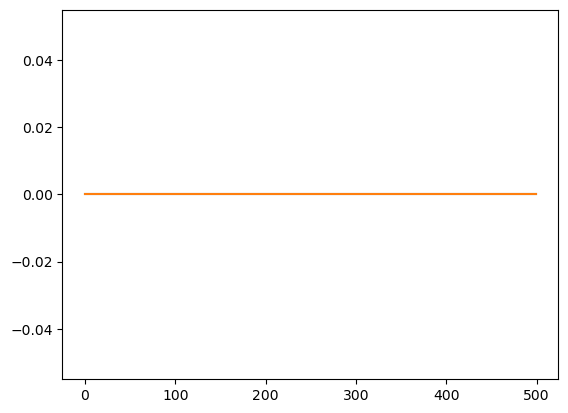

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])